In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('H:\\AiQuest\\Ai& ML\\practice\\class 9\\weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
df1 = df.copy()


# One hot encoding

In [8]:
from pandas.core.dtypes.common import is_numeric_dtype

for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    one = pd.get_dummies(df1[col],drop_first=True)
    df1.drop(df1[[col]], axis=1, inplace=True)
    df1=pd.concat([df1,one], axis=1)
df1.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [9]:
df1.head(5010)

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
5005,65.968019,156.802083,0
5006,62.850379,114.969038,0
5007,65.652156,165.083001,0
5008,61.890234,111.676199,0


<AxesSubplot:xlabel='Male', ylabel='count'>

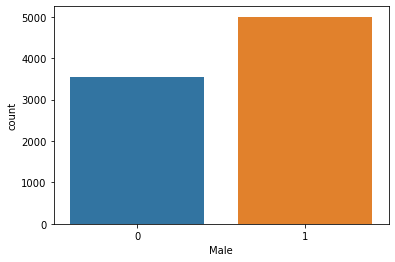

In [10]:
sns.countplot(df1['Male'], data = df1)

Text(0.5, 1.0, 'height vs gender')

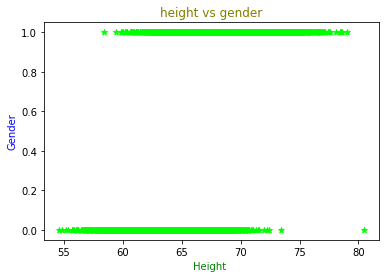

In [11]:
plt.scatter(df1['Height'],df1['Male'],color= '#00FF00',marker='*')
plt.xlabel('Height ', color='green')
plt.ylabel('Gender', color='blue')
plt.title('height vs gender', color='#808000')

Text(0.5, 1.0, ' weight vs gender')

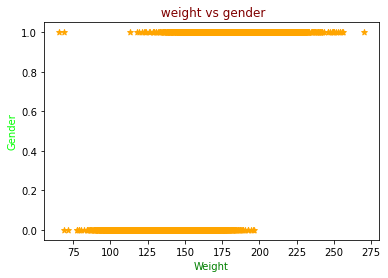

In [12]:
plt.scatter(df['Weight'], df1['Male'],color= '#FFA500',marker='*')
plt.xlabel('Weight', color='green')
plt.ylabel('Gender', color='#00FF00')
plt.title(' weight vs gender', color='#800000')


# KNN Classifier

In [13]:
x = df1.drop('Male', axis = 1)
y = df1['Male']

In [14]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=2)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=93)

neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=93)

In [15]:
if neigh.predict([[73.847017,241.893563]]) == 1:
    print("Male")
else:
    print("Female")     

Male


In [16]:
if neigh.predict([[65.968019,156.802083]]) == 1:
    print("Male")
else:
    print("Female") 

Female


In [17]:
y_prediction =  neigh.predict(xtest)
y_prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

# Classification Report

In [18]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(ytest, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1058
           1       0.93      0.92      0.93      1509

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [19]:
cm = confusion_matrix(ytest, y_prediction)
cm

array([[ 950,  108],
       [ 117, 1392]], dtype=int64)

In [20]:
neigh.score(xtest, ytest)

0.9123490455784963

In [21]:
from sklearn import metrics
metrics.accuracy_score(ytest, y_prediction) * 100

91.23490455784963

<AxesSubplot:>

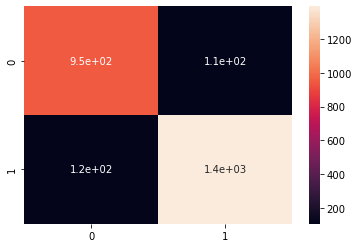

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot = True)

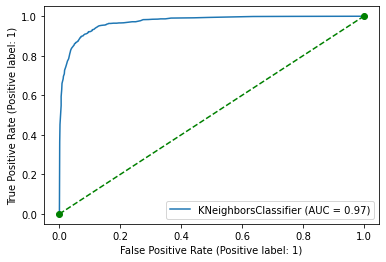

In [23]:
plot_roc_curve(neigh, xtest, ytest)
plt.plot([0,1],[0,1], 'go--')

In [24]:
import sklearn.metrics
import math

def matrix_metrix(ytest,y_prediction):
   CM = confusion_matrix(ytest,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)


In [25]:
mat_met = matrix_metrix(ytest,y_prediction)
print (mat_met)

        Metric      Value
0           TP   950.0000
1           TN  1392.0000
2           FP   117.0000
3           FN   108.0000
4   Population  2567.0000
5   Prevalence     0.4200
6     Accuracy     0.9123
7    Precision     0.8903
8          NPV     0.9280
9          FDR     0.1097
10         TPR     0.8979
11      Recall     0.8979
12         FPR     0.0775
13         FNR     0.1021
14         TNR     0.9225
15         CSI     0.8085
16  F1_measure     0.8941
17          F1     0.8941
18          BA     0.9102


# KNN Regression

In [26]:
df2 = df1.copy()

In [27]:
x = df2.drop('Weight', axis = 1)
y = df2['Weight']

In [28]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.30,random_state=2)

from sklearn.neighbors import KNeighborsRegressor
neigh_regression = KNeighborsRegressor(n_neighbors=93)

neigh_regression.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=93)

In [29]:
neigh_regression.predict([[73.847017, 1]])

array([215.97740531])

In [30]:
y_pred=  neigh_regression.predict(xtest)
y_pred

array([152.48662108, 159.65050522, 192.46943875, ..., 222.77222726,
       169.9447301 , 186.66826581])

In [31]:
np.array(ytest)

array([135.6308771, 138.0926359, 190.3244396, ..., 219.1132095,
       156.6766747, 178.6855465])

# MSE

In [32]:
from  sklearn.metrics import  mean_squared_error
mse= mean_squared_error(ytest,y_pred)
mse

102.78990568183197

# MAE

In [33]:
from  sklearn.metrics import  mean_absolute_error
mae= mean_absolute_error(ytest,y_pred)
mae

8.011883701101489

# Accuracy

In [34]:
neigh_regression.score(xtest, ytest)

0.8998431748994545

In [35]:
neigh_regression.score(xtrain, ytrain)

0.8970794817196001

# Linear Regression

In [36]:
df3 = df1.copy()

In [37]:
x = df1.drop('Weight', axis = 1)
y = df1['Weight']

In [38]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=2)

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(xtrain,ytrain)

LinearRegression()

In [39]:
linear_reg.predict([[73.847017, 1]])

array([215.73185652])

In [40]:
y_pred=  linear_reg.predict(xtest)
y_pred

array([151.09452981, 159.65636907, 195.28013188, ..., 224.29551941,
       170.296596  , 187.99709823])

In [41]:
np.array(ytest)

array([135.6308771, 138.0926359, 190.3244396, ..., 219.1132095,
       156.6766747, 178.6855465])

# MSE

In [42]:
from  sklearn.metrics import  mean_squared_error
mse= mean_squared_error(ytest,y_pred)
mse

98.58171971089342

# MAE

In [43]:
from  sklearn.metrics import  mean_absolute_error
mae= mean_absolute_error(ytest,y_pred)
mae

7.870801028640494

# Accuracy

In [44]:
linear_reg.score(xtest, ytest)

0.9039435633907765

In [45]:
linear_reg.score(xtrain, ytrain)

0.8982420247072804

# Decision Tree

In [46]:
df4 = df1.copy()

In [47]:
x = df4.drop('Male', axis = 1)
y = df4['Male']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=1)

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_prediction = clf.predict(x_test)
y_prediction

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [51]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1055
           1       0.89      0.91      0.90      1512

    accuracy                           0.88      2567
   macro avg       0.88      0.88      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [52]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[ 890,  165],
       [ 135, 1377]], dtype=int64)

In [53]:
clf.score(x_test, y_test)

0.8831320607713284

In [54]:
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy * 100)

88.31320607713285


<AxesSubplot:>

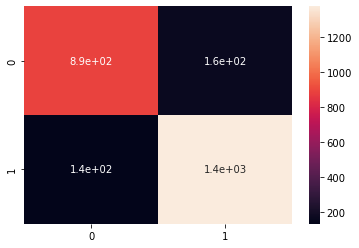

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot = True)

# ROC CURVE

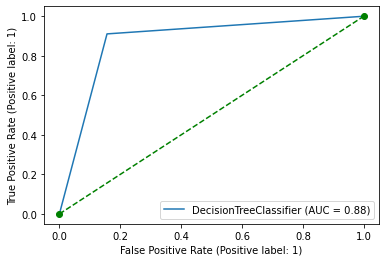

In [56]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1], 'go--')

In [57]:
import sklearn.metrics
import math

def matrix_metrix(y_test,y_prediction):
   CM = confusion_matrix(y_test,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)


In [58]:
mat_met = matrix_metrix(y_test,y_prediction)
print (mat_met)

        Metric      Value
0           TP   890.0000
1           TN  1377.0000
2           FP   135.0000
3           FN   165.0000
4   Population  2567.0000
5   Prevalence     0.4000
6     Accuracy     0.8831
7    Precision     0.8683
8          NPV     0.8930
9          FDR     0.1317
10         TPR     0.8436
11      Recall     0.8436
12         FPR     0.0893
13         FNR     0.1564
14         TNR     0.9107
15         CSI     0.7479
16  F1_measure     0.8560
17          F1     0.8558
18          BA     0.8772
